In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

mpl.style.use('ggplot')

%matplotlib inline

In [85]:
df_can = pd.read_excel('./data/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [86]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [87]:
df_can.shape

(195, 43)

In [88]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

In [89]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [90]:
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

In [91]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [92]:
df_can.columns = list(map(str, df_can.columns))

In [93]:
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [94]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [95]:
df_can.set_index('Country', inplace = True)

In [96]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [97]:
df_can['Total'] = df_can.iloc[:, 3:].sum(axis = 1)

In [98]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [99]:
years = list(map(str, range(1980, 2014))) 
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## Waffle Charts

In [100]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

In [101]:
df_dsn.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [102]:
total_values = sum(df_dsn["Total"])
category_proportions = [(value / total_values) for value in df_dsn["Total"]]

In [103]:
category_proportions = []

for value in df_dsn['Total']:
    category_proportions.append(value / total_values)
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [104]:
[(float(value) / total_values) for value in df_dsn["Total"]]

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [105]:
%%timeit
[(float(value) / total_values) for value in df_dsn["Total"]]

15.2 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [106]:
%%timeit
(df_dsn['Total'] / total_values).to_numpy()

273 µs ± 110 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [107]:
category_proportions = (df_dsn['Total'] / total_values).to_list()
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [108]:
width = 40
height = 10
total_num_tiles = width * height

print(total_num_tiles)

400


In [109]:
# compute the number of tiles for each catagory 
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions] 
# print out number of tiles per category 
for i, tiles in enumerate(tiles_per_category): 
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [110]:
waffle_chart = np.zeros((height, width))
waffle_chart.shape

(10, 40)

In [111]:
tiles_per_category[0:3]

[129, 77, 194]

In [112]:
category_index = 0
tile_index = 0

for col in range(width): 
    for row in range(height): 
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]): 
            category_index += 1
        waffle_chart[row, col] = category_index
print ('Waffle chart populated!')

Waffle chart populated!


In [113]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

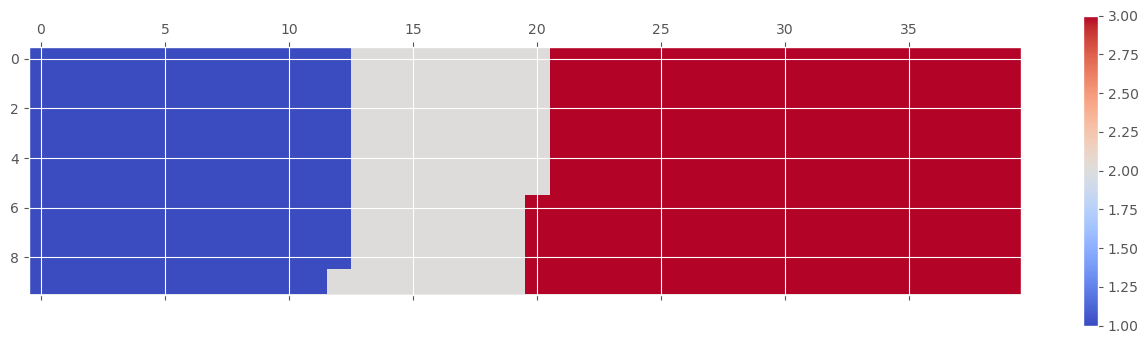

In [114]:
fig = plt.figure()
colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap=colormap) 
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

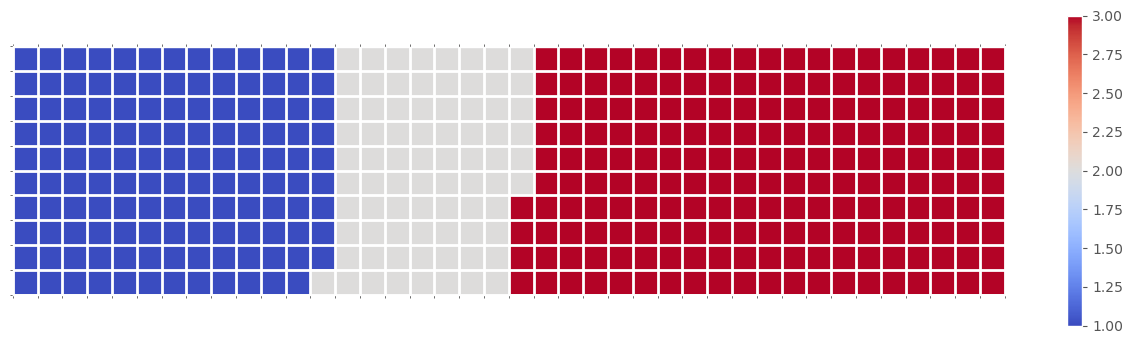

In [115]:
fig = plt.figure()
colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap=colormap) 
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True) 
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2) 

plt.xticks([]) 
plt.yticks([])

<Figure size 640x480 with 0 Axes>

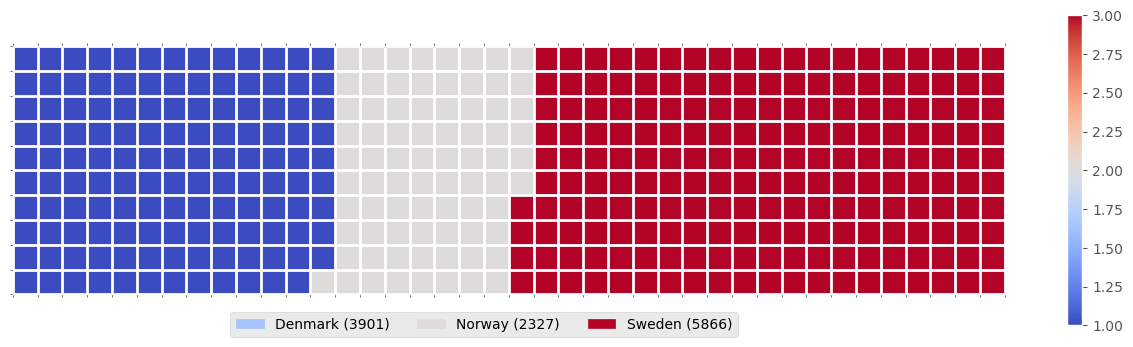

In [116]:
fig = plt.figure()
colormap = plt.cm.coolwarm 

plt.matshow(waffle_chart, cmap=colormap) 
plt.colorbar()

ax = plt.gca() 
ax.set_xticks(np.arange(-.5, (width), 1), minor=True) 
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2) 

plt.xticks([]) 
plt.yticks([]) 
values_cumsum = np.cumsum(df_dsn['Total']) 
total_values = values_cumsum[len(values_cumsum) - 1] 

legend_handles = [] 
for i, category in enumerate(df_dsn.index.values): 
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')' 
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles, 
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1) )


In [117]:
legend_handles = [] 
for i, category in enumerate(df_dsn.index.values): 
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')' 
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))


In [118]:
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

In [119]:
df_dsn['Total'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64>

In [120]:
df_dsn['Total'].cumsum().iloc[0] / total_values

0.32255663965602777

In [121]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_values = sum(values) 
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height
    # print('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    # for i, tiles in enumerate(tiles_per_category): 
    #     print(df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix 
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart 
    category_index = 0 
    tile_index = 0

    # populate the waffle chart 
    for col in range(width): 
        for row in range(height): 
            tile_index += 1 
    # if the number of tiles populated for the current category 
    # is equal to its corresponding allocated tiles... 
            if tile_index > sum(tiles_per_category[0:category_index]): 
    # ...proceed to the next category 
                category_index += 1 
    # set the class value to an integer, which increases with class 
            waffle_chart[row, col] = category_index
    
    fig = plt.figure() 
    colormap = plt.cm.coolwarm 
    plt.matshow(waffle_chart, cmap=colormap) 
    plt.colorbar()
    ax = plt.gca() 
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True) 
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True) # add dridlines based on minor ticks 
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([]) 
    plt.yticks([])

    values_cumsum = np.cumsum(values) 
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = [] 
    for i, category in enumerate(categories): 
        if value_sign == '%': 
            label_str = category + ' (' + str(values[i]) + value_sign + ')' 
        else: 
            label_str = category + ' (' + value_sign + str(values[i]) + ')' 
            color_val = colormap(float(values_cumsum[i])/total_values) 
            legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    plt.legend(handles=legend_handles, 
           loc='lower center', 
           ncol=len(categories),
           bbox_to_anchor=(0., -0.2, 0.95, .1) )
    

In [122]:
width = 40 # width of chart 
height = 10 # height of chart 
categories = df_dsn.index.values # categories 
values = df_dsn['Total'] # correponding values of categories 
colormap = plt.cm.coolwarm # color map class

<Figure size 640x480 with 0 Axes>

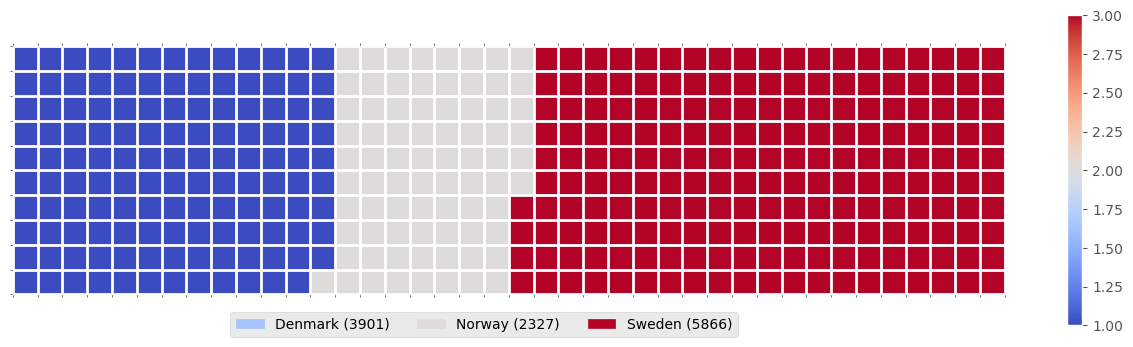

In [123]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [132]:
alice_novel = open('./data/alice_novel.txt', 'r').read()

In [133]:
stopwords = set(STOPWORDS)

In [136]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [134]:
alice_wc = WordCloud( background_color='white', 
                     max_words=2000, 
                     stopwords=stopwords 
)
alice_wc.generate(alice_novel)

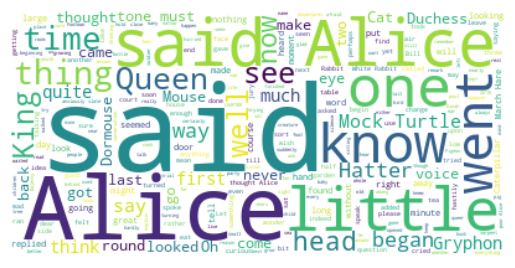

In [135]:
plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

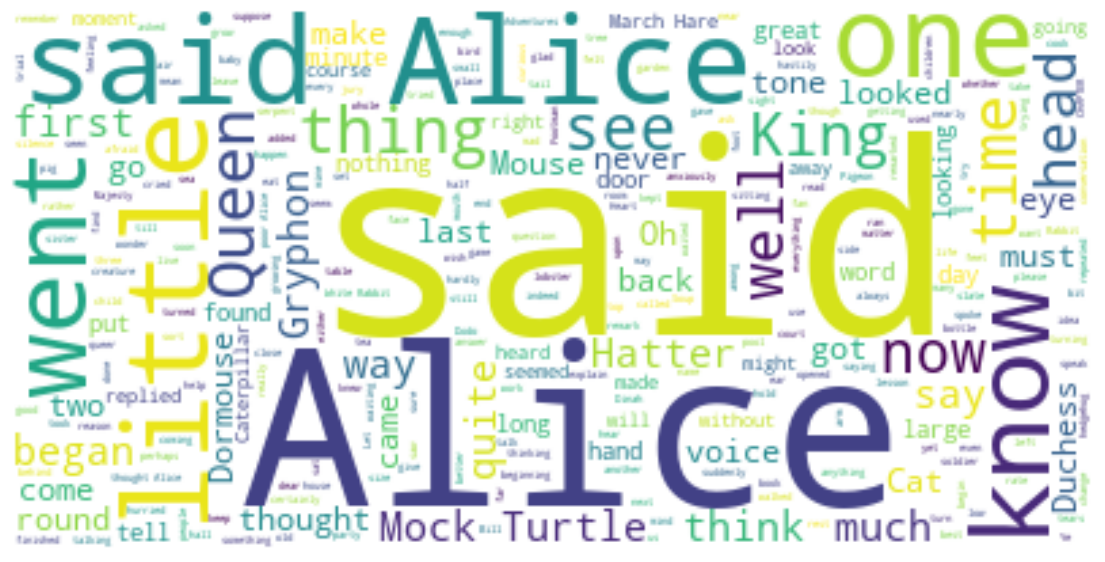

In [129]:
fig = plt.figure() 
fig.set_figwidth(14) # set width 
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

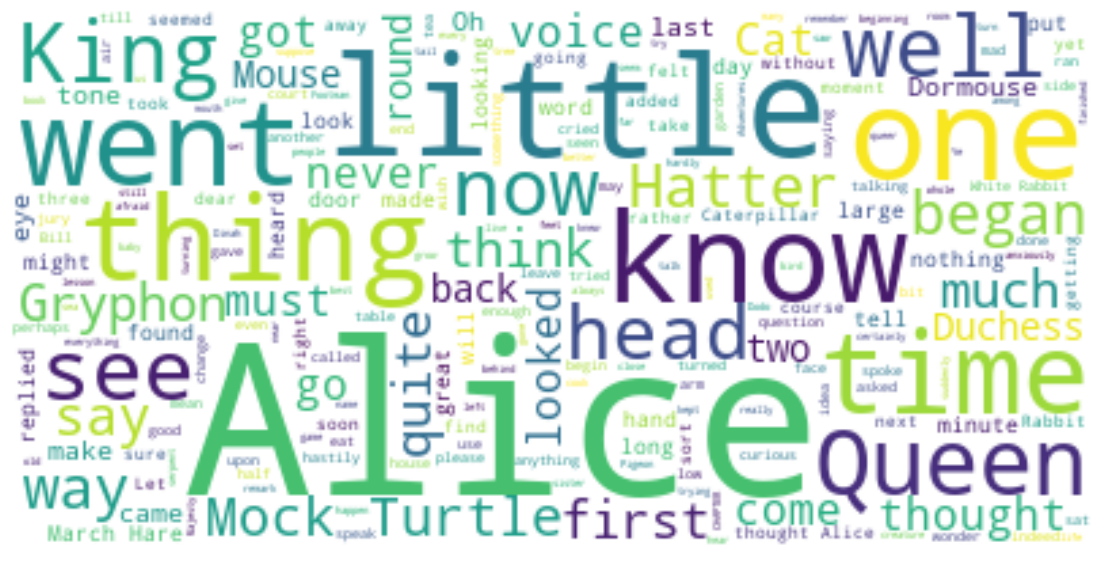

In [130]:
stopwords.add('said')
alice_wc.generate(alice_novel)
fig = plt.figure() 
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [137]:
alice_mask = np.array(Image.open('./img/alice_mask.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


In [138]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

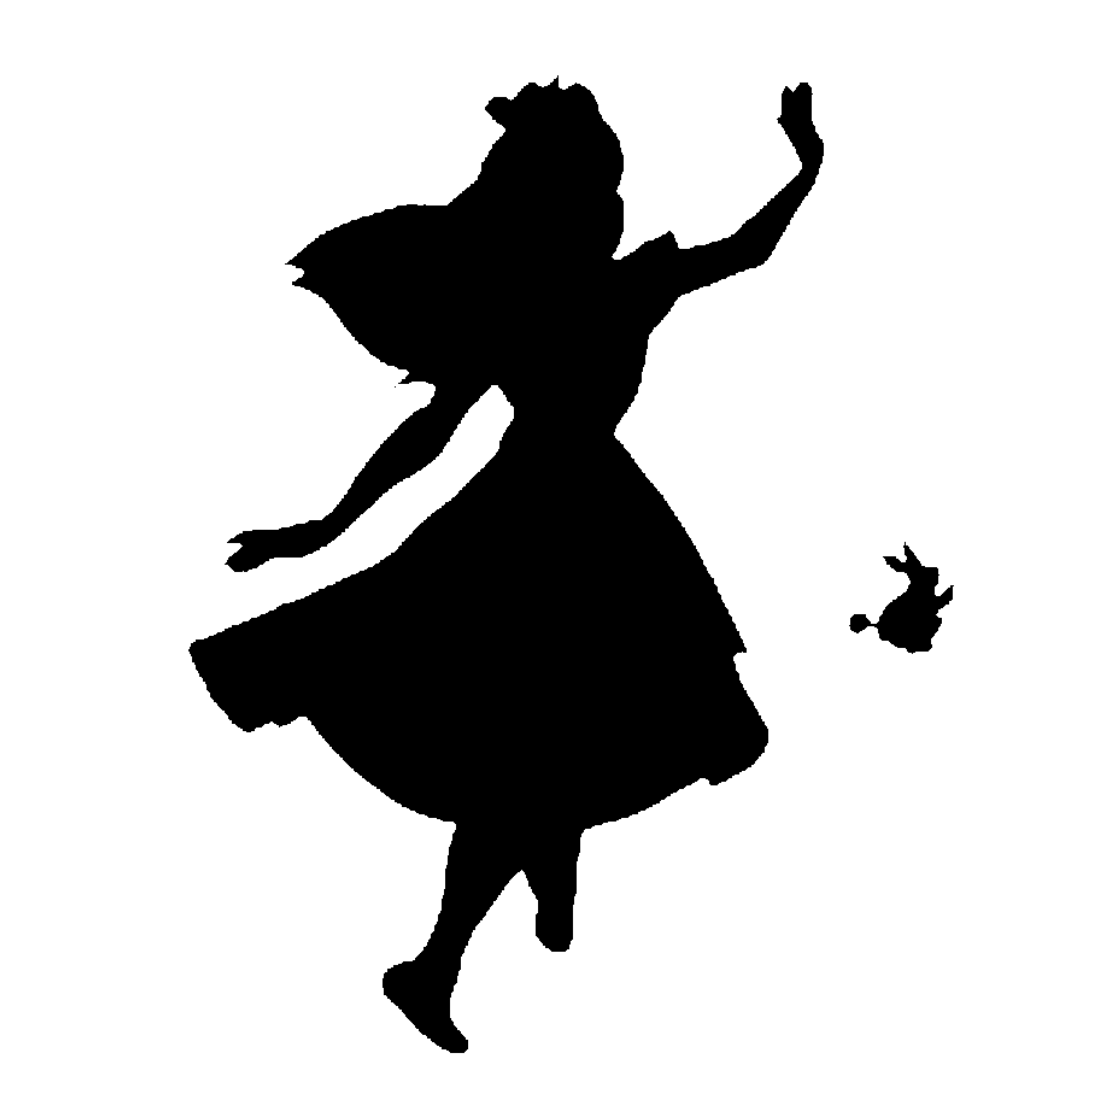

In [139]:
fig = plt.figure() 
fig.set_figwidth(14) # set width 
fig.set_figheight(18) # set height 

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') 
plt.axis('off') 
plt.show()


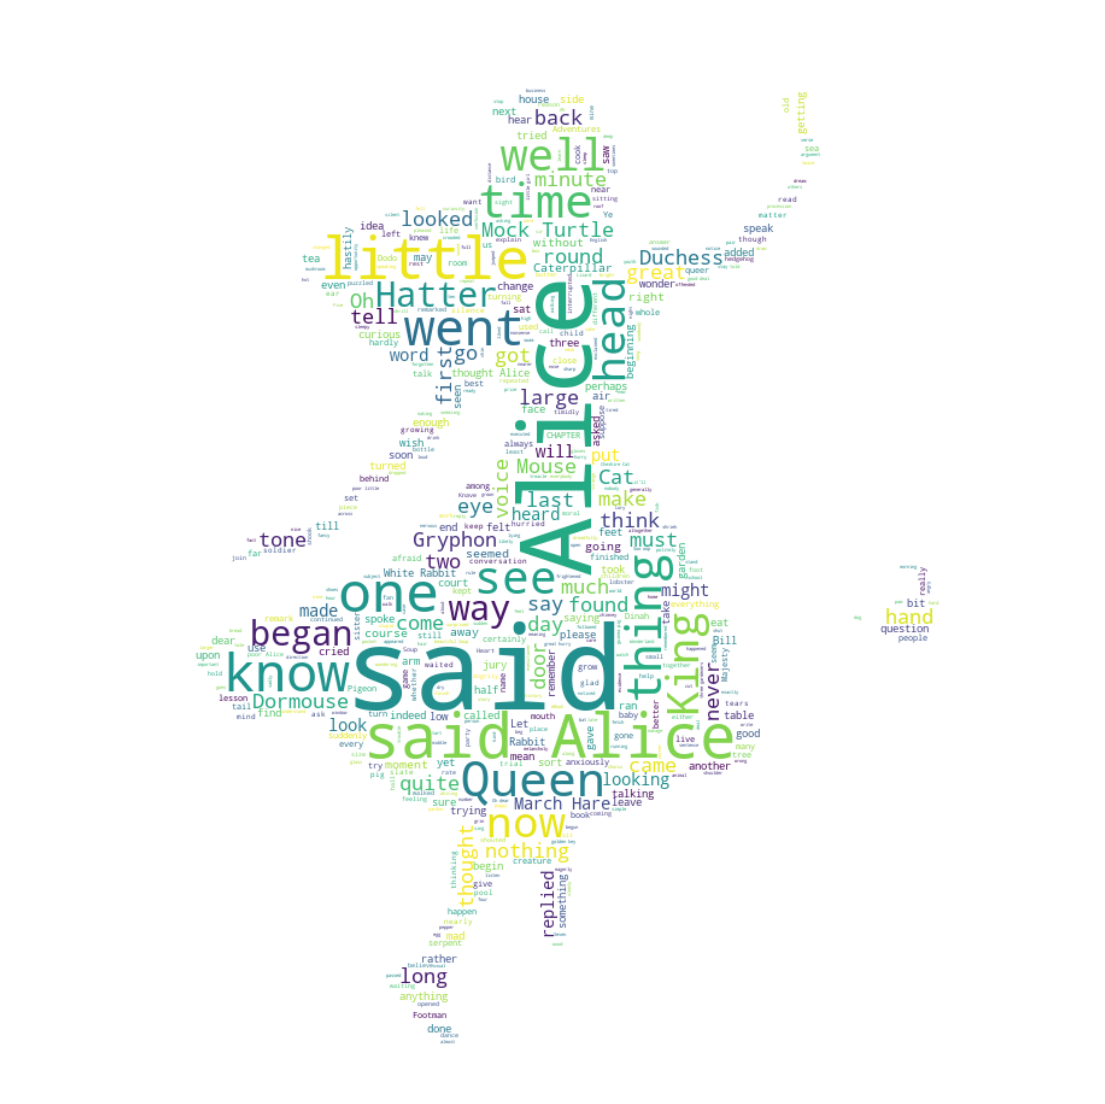

In [140]:
# instantiate a word cloud object 
alice_wc = WordCloud(background_color='white', 
                     max_words=2000, 
                     mask=alice_mask, 
                     stopwords=stopwords
) # generate the word cloud 
alice_wc.generate(alice_novel) # display the word cloud 
fig = plt.figure() 
fig.set_figwidth(14) # set width 
fig.set_figheight(18) # set height 
plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [142]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [ ]:
int(df_can.loc['China', 'Total'] / total_immigration)

In [143]:
max_words = 90 
word_string = '' 
for country in df_can.index.values: 
    if len(country.split(' ')) == 1: 
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words) 
        word_string = word_string + ((country + ' ') * repeat_num_times) 

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [146]:
set(word_string.split())

{'China',
 'Colombia',
 'Egypt',
 'France',
 'Guyana',
 'Haiti',
 'India',
 'Jamaica',
 'Lebanon',
 'Morocco',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania'}

In [144]:
wordcloud = WordCloud(background_color='white').generate(word_string) 
print('Word cloud created!')

Word cloud created!


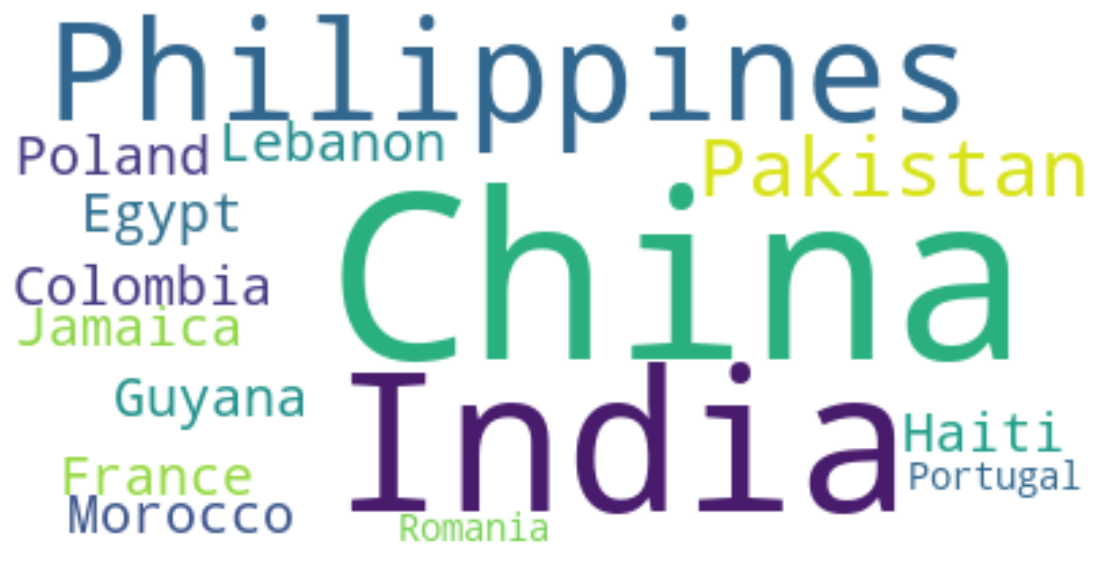

In [147]:
fig = plt.figure() 
fig.set_figwidth(14) 
fig.set_figheight(18) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()

## Regression Plots

In [149]:
# we can use the sum() method to get the total population per year 
df_tot = pd.DataFrame(df_can[years].sum(axis=0)) 
# change the years to type float (useful for regression later on) 
df_tot.index = map(float,df_tot.index) 
# reset the index to put in back in as a column in the df_tot dataframe 
df_tot.reset_index(inplace = True) 
# rename columns 
df_tot.columns = ['year', 'total'] 
# view the final dataframe 
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


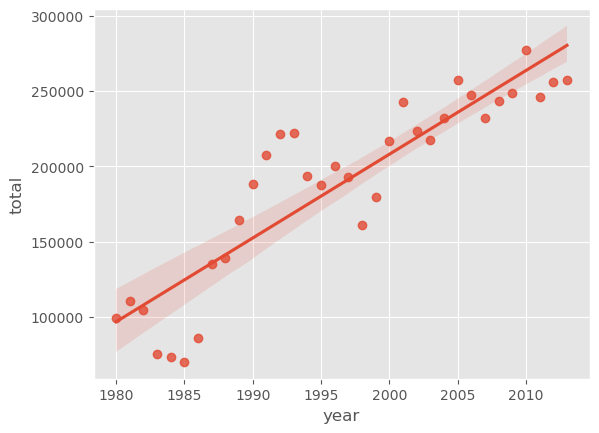

In [150]:
ax = sns.regplot(x='year', y='total', data=df_tot)

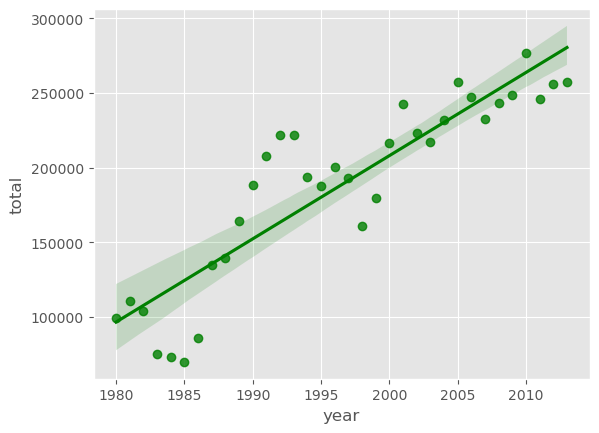

In [151]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

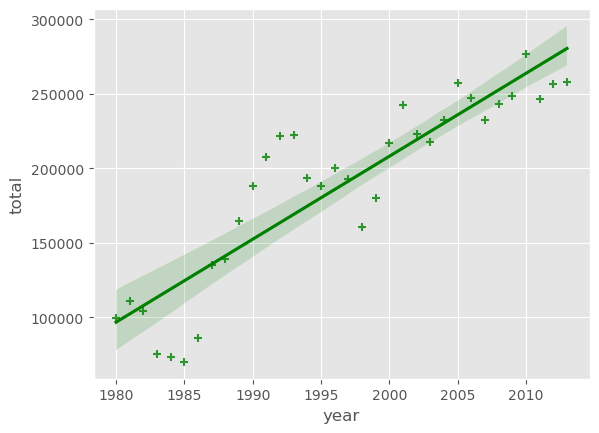

In [152]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

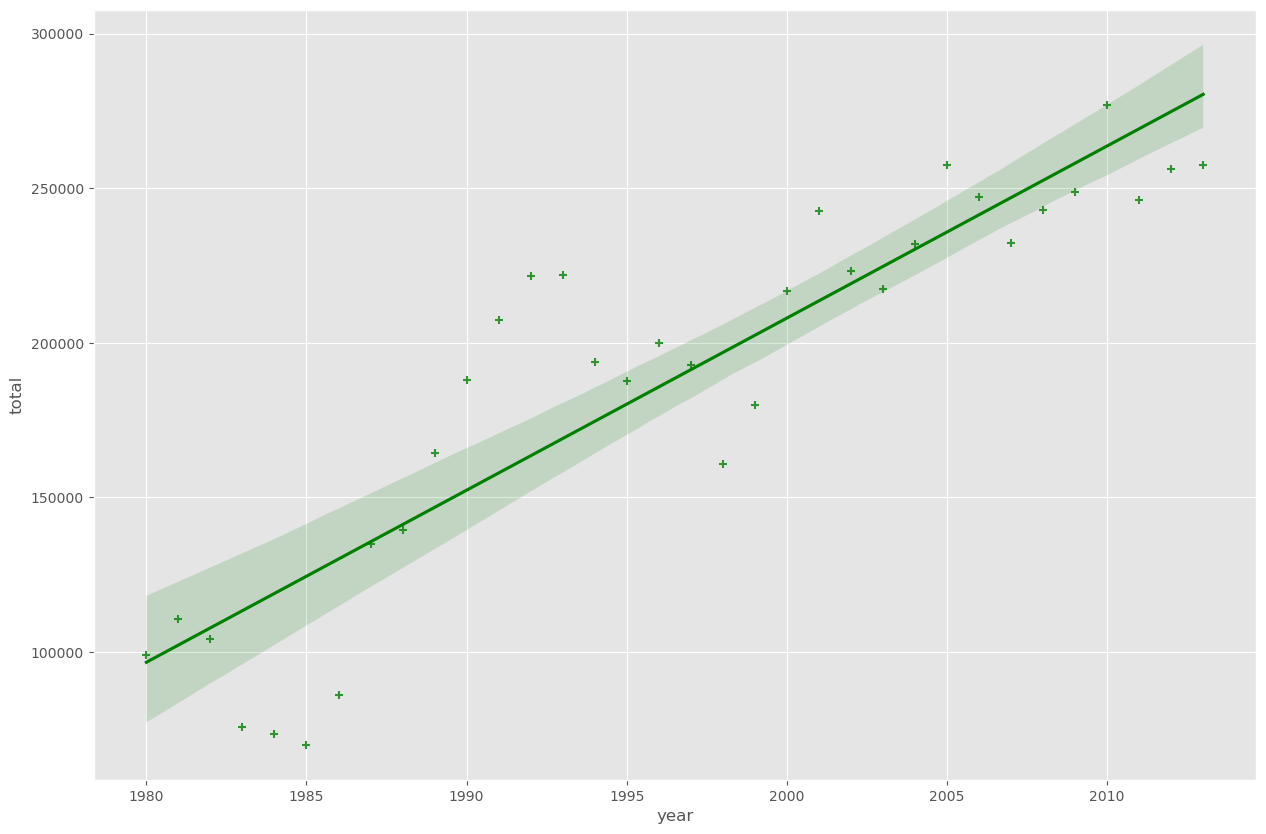

In [153]:
plt.figure(figsize=(15, 10)) 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

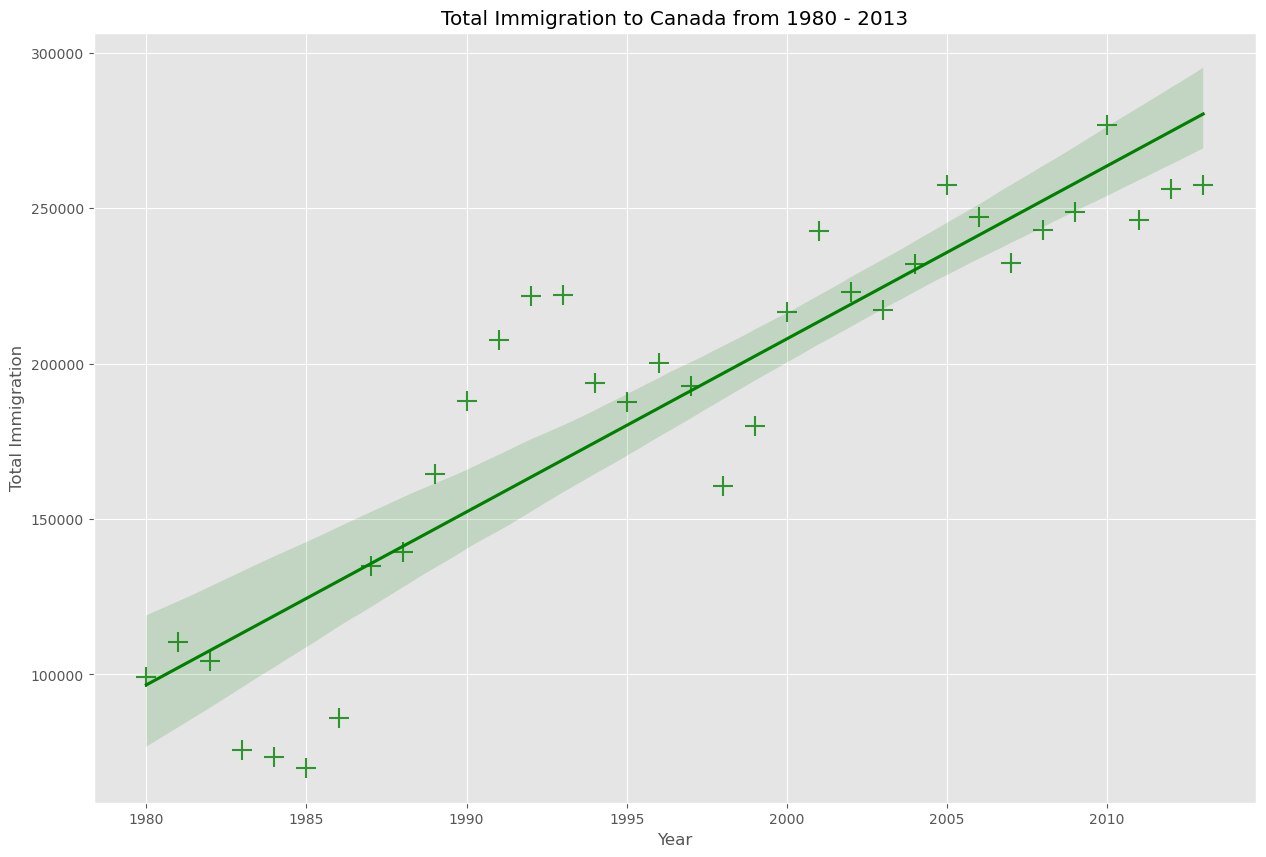

In [154]:
plt.figure(figsize=(15, 10)) 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200}) 
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013') 

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

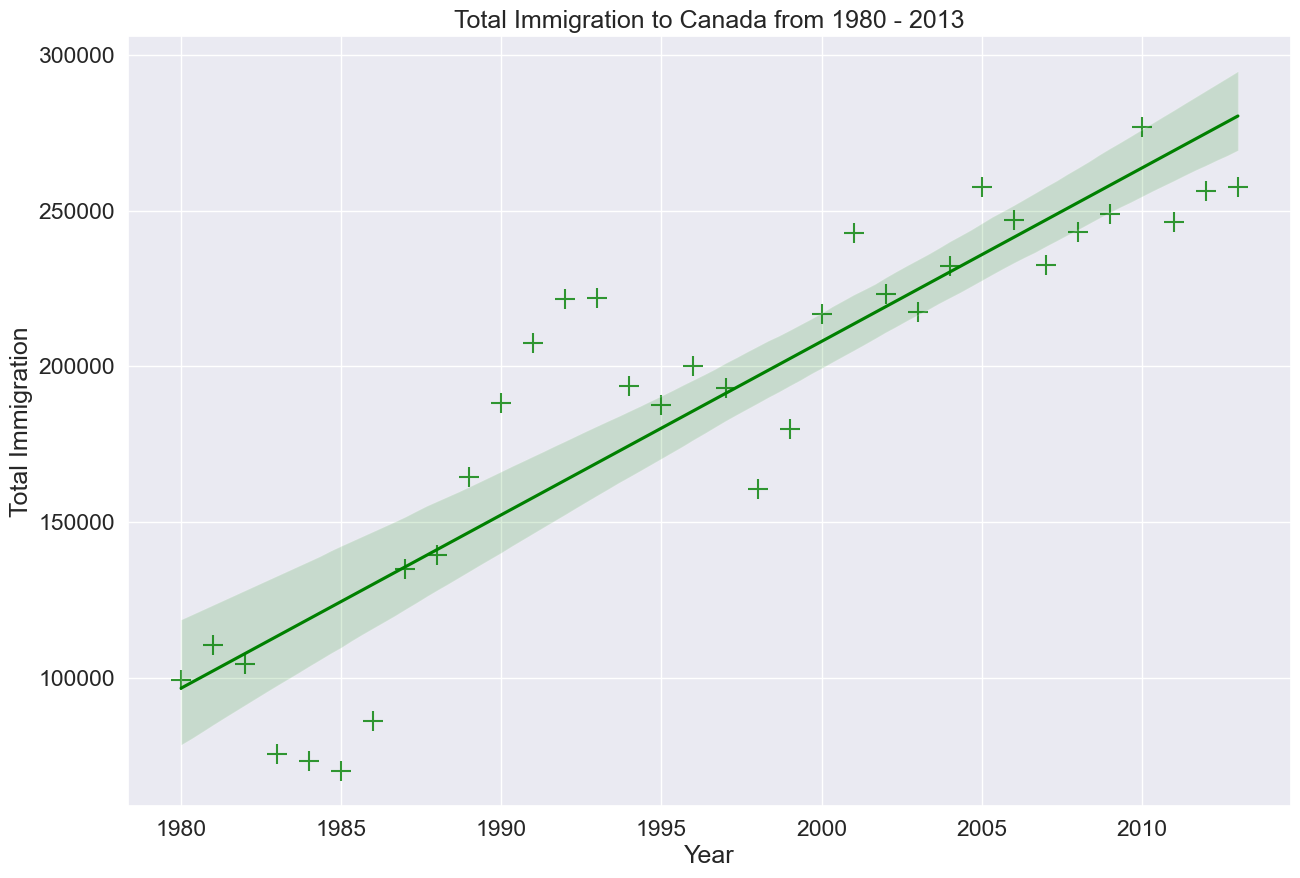

In [155]:
plt.figure(figsize=(15, 10)) 
sns.set(font_scale=1.5) 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200}) 
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

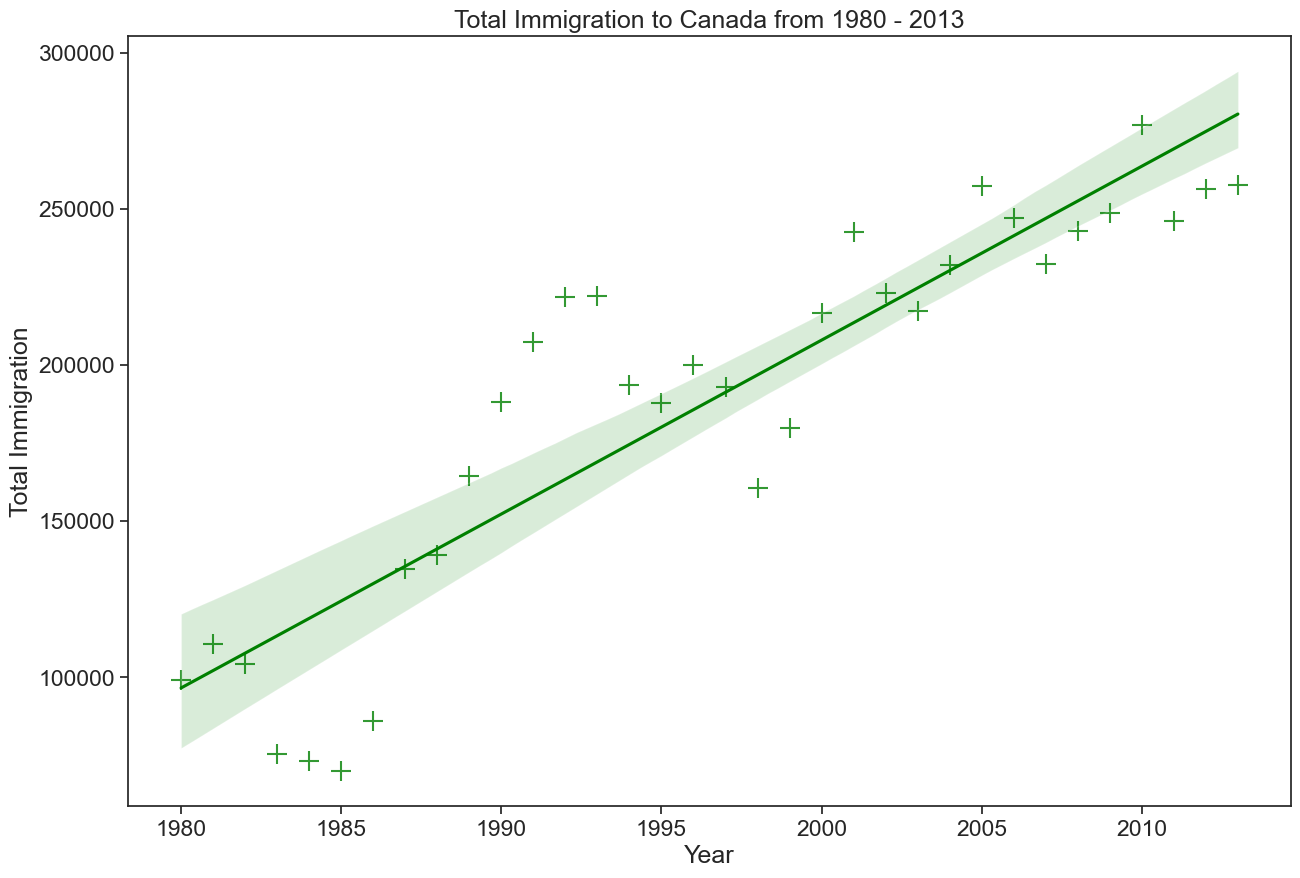

In [156]:
plt.figure(figsize=(15, 10)) 
sns.set(font_scale=1.5) 
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200}) 
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

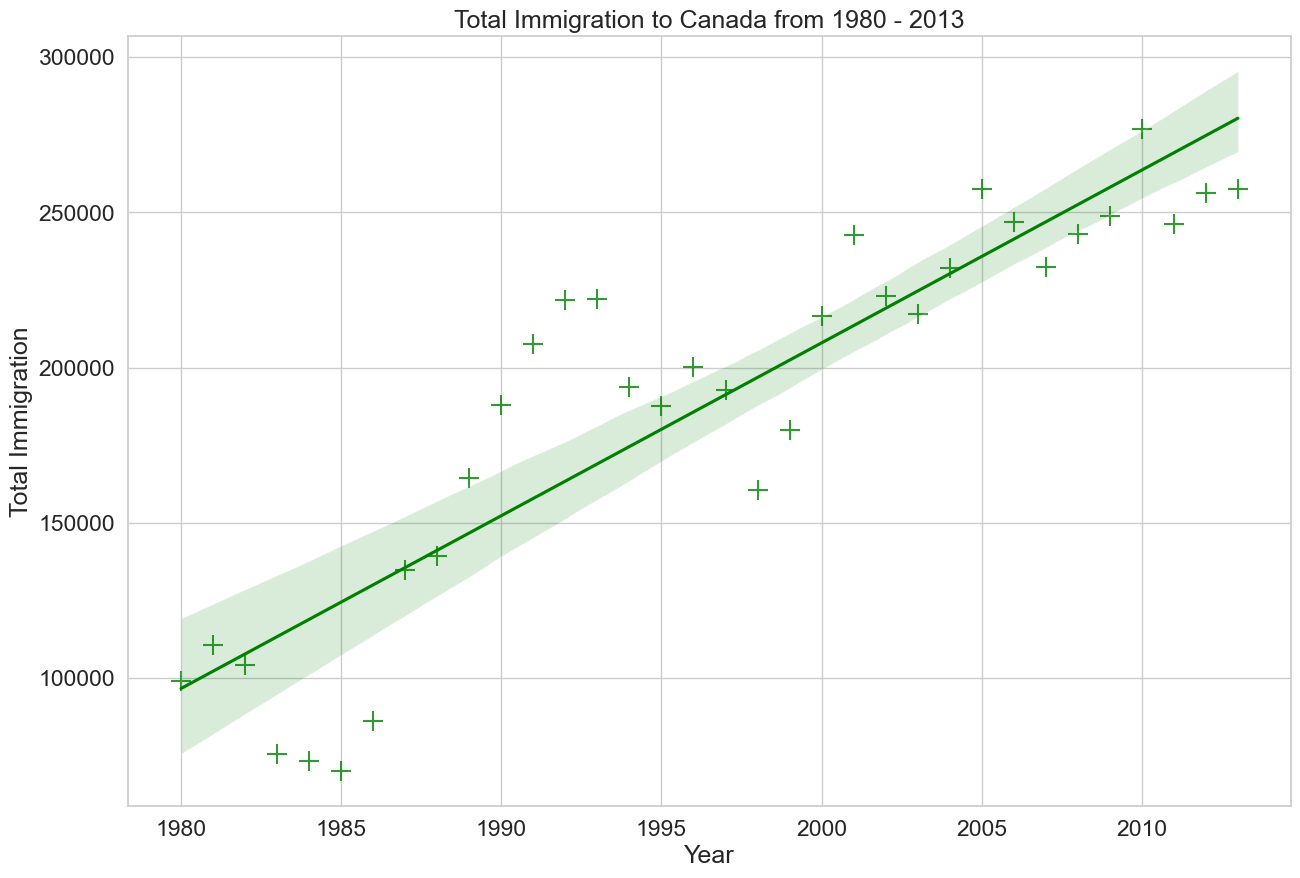

In [157]:
plt.figure(figsize=(15, 10)) 
sns.set(font_scale=1.5) 
sns.set_style('whitegrid') 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200}) 
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

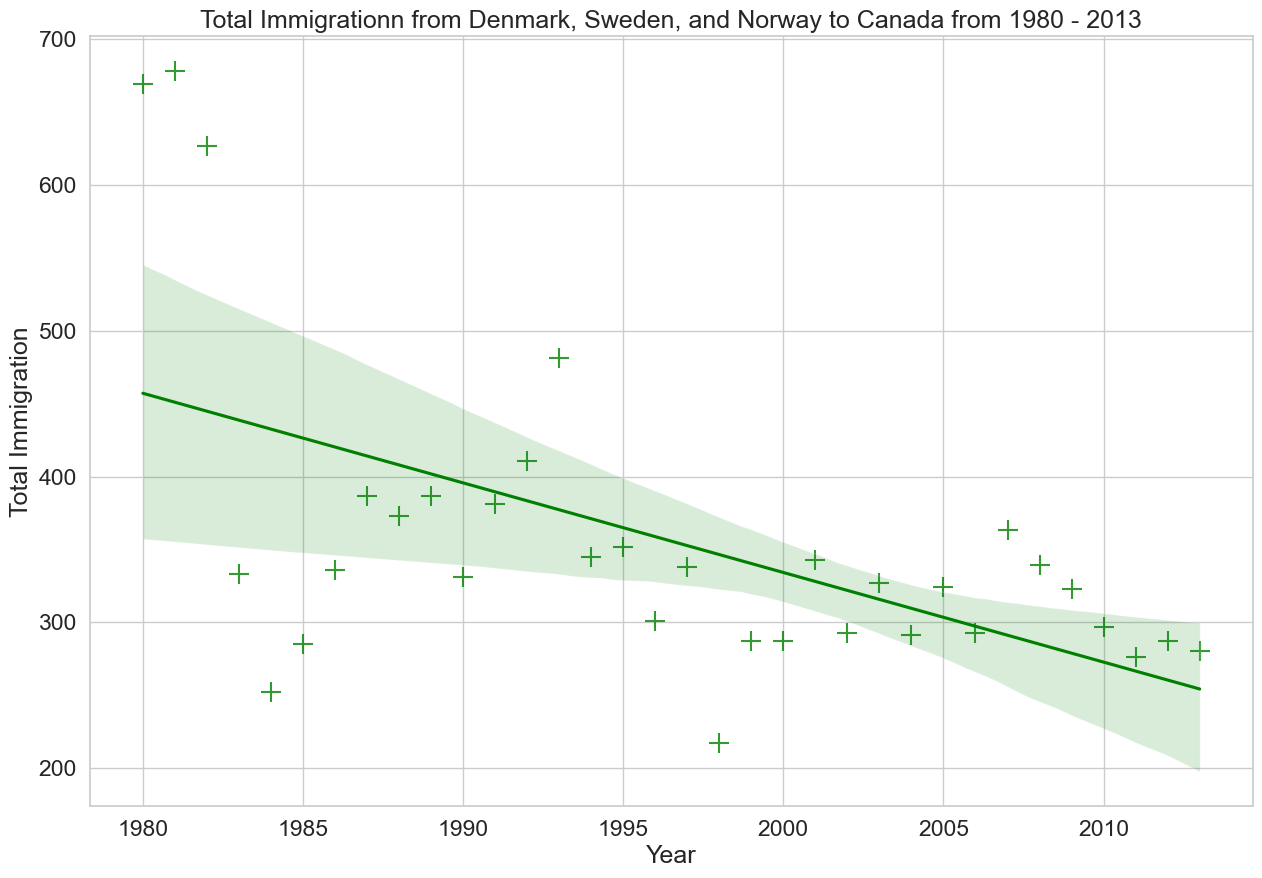

In [158]:
# create df_countries dataframe 
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose() 
# create df_total by summing across three countries for each year 
df_total = pd.DataFrame(df_countries.sum(axis=1)) 
# # reset index in place 
df_total.reset_index(inplace=True) 
# # rename columns 
df_total.columns = ['year', 'total'] 
# change column year from string to int to create scatter plot 
df_total['year'] = df_total['year'].astype(int) 
# define figure size 
plt.figure(figsize=(15, 10)) 
# define background style and font size 
sns.set(font_scale=1.5) 
sns.set_style('whitegrid') 
# generate plot and add title and axes labels 
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200}) 
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')